<a href="https://colab.research.google.com/github/yuna1411/Car-Price-Prediction-Bootcamp/blob/main/stage1/Stage_1_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

%matplotlib inline

# Import Dataset

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfcar = pd.read_csv('/content/drive/MyDrive/car_prices.csv', on_bad_lines="skip")
dfcar.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
272184,2014,Ram,1500,SLT,Quad Cab,automatic,1c6rr7gt6es307598,ca,4.5,20762.0,white,gray,enterprise vehicle exchange/orange,24700,24000,Tue Feb 10 2015 04:30:00 GMT-0800 (PST)
8737,2011,Cadillac,Escalade ESV,Platinum Edition,SUV,automatic,1gys4kef5br193227,tx,4.2,76567.0,white,brown,music city autoplex llc,33100,34000,Wed Jan 14 2015 02:20:00 GMT-0800 (PST)
558068,2008,BMW,X3,3.0si,suv,NaN,wbxpc93408wj11023,pa,4.0,105133.0,silver,black,tsj auto brokers inc,9725,10400,Fri Jun 19 2015 02:15:00 GMT-0700 (PDT)
306204,2013,Ford,Escape,SE,SUV,automatic,1fmcu0gx9duc22258,oh,4.9,7989.0,white,gray,"ford motor credit company,llc",17350,17600,Tue Feb 17 2015 01:00:00 GMT-0800 (PST)
355357,2013,Ford,Mustang,GT,Coupe,automatic,1zvbp8cf0d5279877,ca,3.7,39454.0,red,black,altier credit union,21300,22000,Wed Feb 25 2015 04:30:00 GMT-0800 (PST)


### List fitur pada dataset adalah sebagai berikut :

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe bentuk dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. MMR : Manhiem Market Record, market yang memprediksi harga mobil.
15. Sellingprice : Nilai jual mobil.
16. Saledate : Tanggal mobil dijual.

# Data Exploration

In [ ]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85628 entries, 0 to 85627
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          85628 non-null  int64  
 1   make          85270 non-null  object 
 2   model         85252 non-null  object 
 3   trim          85025 non-null  object 
 4   body          83176 non-null  object 
 5   transmission  75188 non-null  object 
 6   vin           85628 non-null  object 
 7   state         85627 non-null  object 
 8   condition     73835 non-null  float64
 9   odometer      85552 non-null  float64
 10  color         85452 non-null  object 
 11  interior      85452 non-null  object 
 12  seller        85627 non-null  object 
 13  mmr           85627 non-null  float64
 14  sellingprice  85627 non-null  float64
 15  saledate      85627 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 10.5+ MB


1. Total dari data ada 558811 entry
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya
3. Terdapat nilai Null pada beberapa fitur

In [ ]:
dfcar.isnull().sum()

year                0
make              358
model             376
trim              603
body             2452
transmission    10440
vin                 0
state               1
condition       11793
odometer           76
color             176
interior          176
seller              1
mmr                 1
sellingprice        1
saledate            1
dtype: int64

Terdapat 9 fitur yang memiliki data Null, dan jumlahnya terhitung banyak terutama di fitur transmission. Perlu diadakan tindak lanjut di Data Cleaning

In [ ]:
dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [ ]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,85628.000,73835.000,85552.000,85627.000,85627.000
mean,2009.186,3.325,76147.094,12370.733,12015.814
std,4.318,0.983,58479.337,9363.473,9370.222
min,1984.000,1.000,1.000,25.000,1.000
25%,2006.000,2.500,29672.000,5225.000,4800.000
50%,2011.000,3.500,62280.000,11150.000,10700.000
75%,2013.000,4.100,112535.000,16850.000,16600.000
max,2015.000,5.000,999999.000,157000.000,156000.000


1. Condition hanya memiliki value antara 1-5.
2. Value dari odometer terlihat memiliki jarak yang jauh antara min dan max.
3. MMR dan sellingprice memiliki nilai yang hampir mirip.

In [ ]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,85270,85252,85025,83176,75188,85628,85627,85452,85452,85627,85627
unique,93,864,1619,42,2,85407,36,20,17,6741,1476
top,Ford,Altima,Base,Sedan,automatic,1hgcp3f83ca041374,ca,black,black,nissan-infiniti lt,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
freq,13460,2819,9205,36775,72268,2,14411,16795,33093,2714,3601


1. Ford merupakan brand yang paling populer diantara 96 total brand lain.
2. Selain itu, mobil tipe sedan juga termasuk yang paling favorit.
3. Transmisi automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%
4. Warna hitam tetap mendominasi baik di eksterior maupun interior.

# **UNIVARIATE ANALYSIS**

**Outlier Numerik (year, condition, odometer, MMR, sellingprice)**

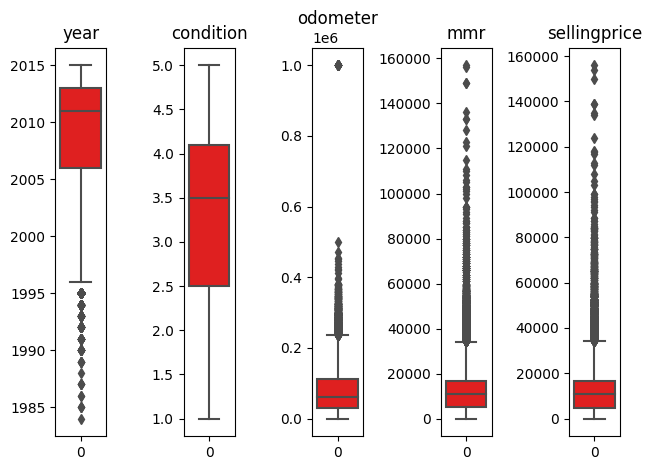

In [ ]:
#melihat penampilan outlier
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa mmr dan selling price memiliki outlier paling banyak. untuk boxplot terlihat range mmr dan selling price tergolong jauh cukup jauh. namun untuk kuartil dan mediannya berada sangat timpang. hal ini dapat terjadi karena nilai mmr dan selling price merupakan harga yang dapat bernilai luas sesuai spesifikasi mobil bekasnya.

**Distribusi (year, condition, odometer, MMR, sellingprice)**

<Figure size 700x300 with 0 Axes>

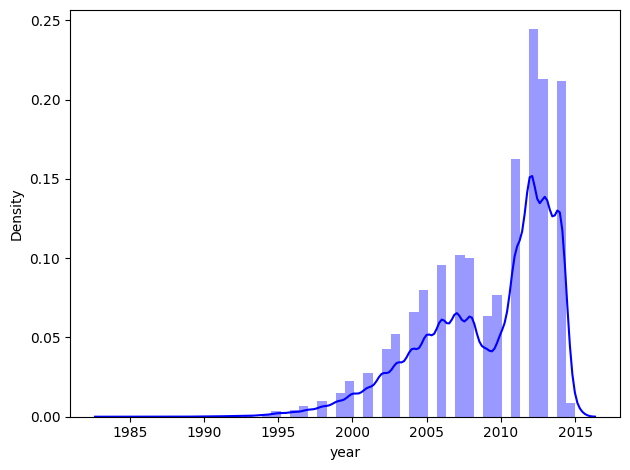

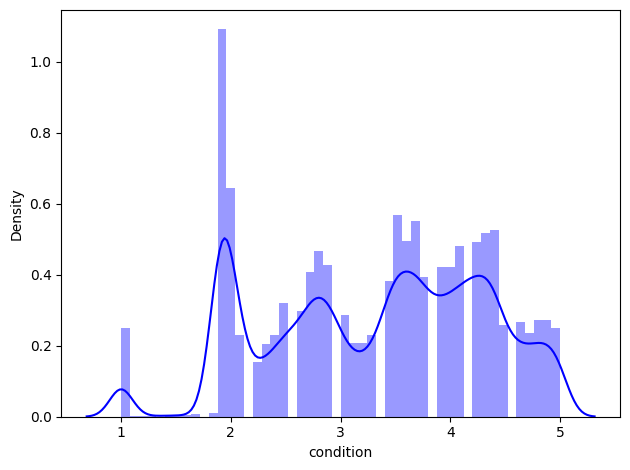

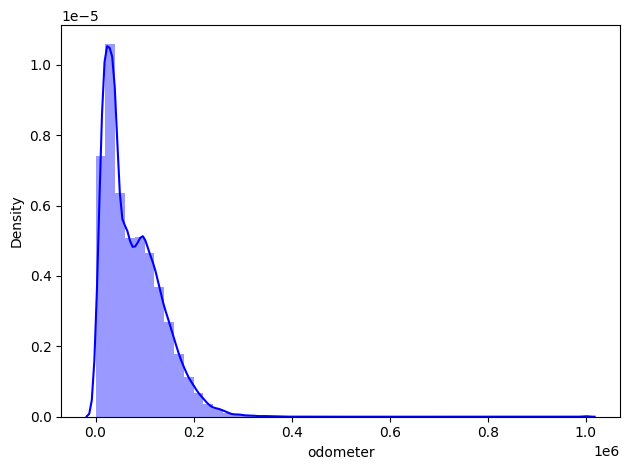

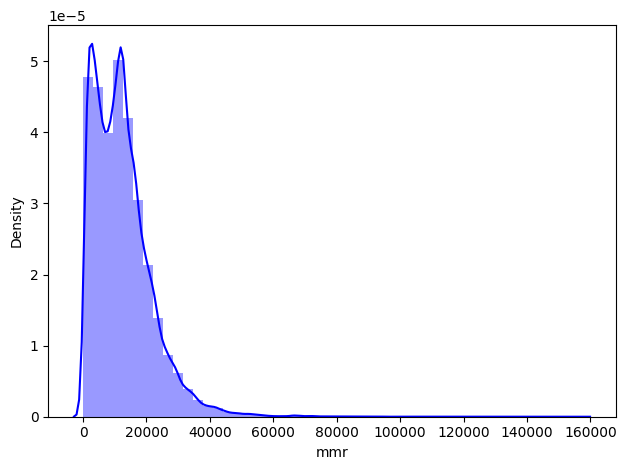

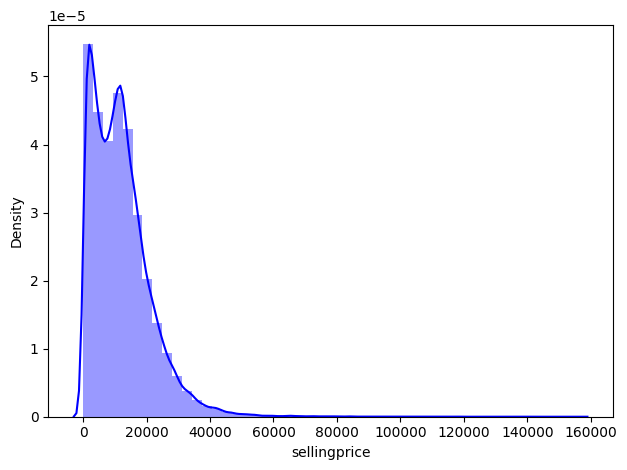

In [ ]:
#melihat grafik distribusi
plt.figure(figsize=(7, 3))
for i in range(0, len(num)):
    plt.figure()
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Untuk tahun penjualannya, cenderung mengalami peningkatan pada setiap tahunnya. dan puncak penjualannya berada di antara tahun 2010 hingga 2015
2. Untuk grafik kondisi, cenderung di angka kondisi 2 hingga 5. Dan dapat terlihat untuk mayoritas berada pada kondisi 2 dan paling sedikit berada pada kondisi 1
3. Untuk odometer dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2. Artinya jarak tempuh mobil tersebut masih pendek. Dan bisa disimpulkan bahwa mayoritas mobil yang dijual masih tergolong pemakaian jangka pendek
4. Untuk grafik MMR, terlihat bahwa grafik tersebut memiliki distribusi positif skew. Mayoritas nilai MMR terdistribusi di angka 0 - 50000
5. Untuk grafik selling price sama seperti MMR, terlihat juga bahwa memiliki grafik positif skew. Mayoritas nilai selling price terdistribusi di angka 0 - 60000

**Transmission**

In [ ]:
#mengelompokan berdasarkan transmission
kel_trans = dfcar.groupby('transmission').size().reset_index(name='count')
kel_trans

,transmission,count
0,automatic,72268
1,manual,2920


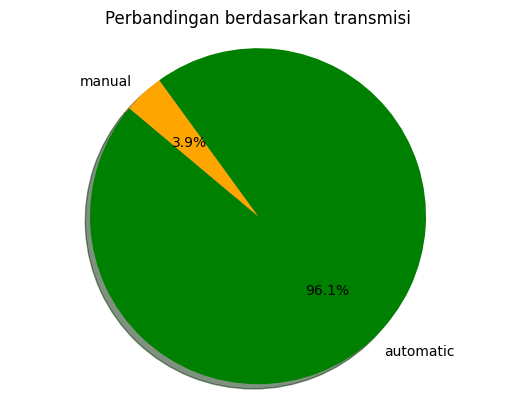

In [ ]:
#visualisasi berdasarkan transmisi
plt.pie(kel_trans['count'], labels=kel_trans['transmission'],
        autopct='%1.1f%%',
        colors=['green', 'orange'],
        shadow=True, startangle=140)
plt.axis('equal')
plt.title('Perbandingan berdasarkan transmisi')
plt.show()

Dapat dilihat bahwa mayoritas mobil yang dijual menggunakan transmisi automatic

In [ ]:
#mengelompokan berdasarkan brand
top_merek = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_merek

,make,count
0,Ford,93554
1,Chevrolet,60197
2,Nissan,53946
3,Toyota,39871
4,Dodge,30710
...,...,...
91,chev truck,1
92,ford tk,1
93,airstream,1
94,hyundai tk,1


**Make**

In [ ]:
#top 10 merek brand
top10 = top_merek.head(10)
top10

,make,count
0,Ford,93554
1,Chevrolet,60197
2,Nissan,53946
3,Toyota,39871
4,Dodge,30710
5,Honda,27206
6,Hyundai,21816
7,BMW,20719
8,Kia,18077
9,Chrysler,17276


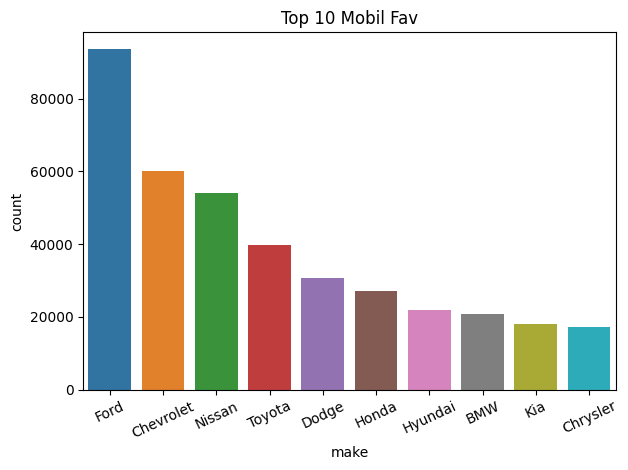

In [ ]:
#visualisasi top brand
plt.figure()
sns.barplot(data = top10, x= 'make', y= 'count')
plt.title('Top 10 Mobil Fav')
plt.xticks(rotation= 25)
plt.tight_layout()

Terlihat bahwa merek mobil paling fav adalah ford, lalu selanjutnya disusul oleh merek chevrolet

**Model**

In [ ]:
#mengelompokan berdasarkan model
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

,model,count
0,Altima,19349
1,F-150,14479
2,Fusion,12946
3,Camry,12545
4,Escape,11861
...,...,...
968,Paseo,1
969,Q3,1
970,Ram Van,1
971,Regency,1


In [ ]:
#top 20 model mobil
top20_model = top_model.head(20)
top20_model

,model,count
0,Altima,19349
1,F-150,14479
2,Fusion,12946
3,Camry,12545
4,Escape,11861
5,Focus,10394
6,Accord,9127
7,3 Series,8204
8,Grand Caravan,7941
9,Impala,7923


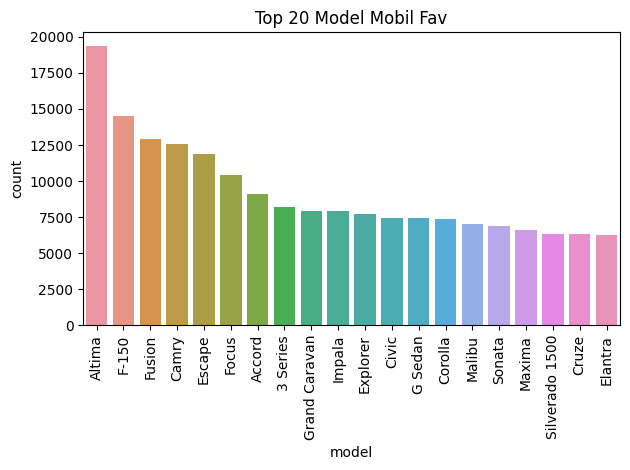

In [ ]:
#visualisasi top model
plt.figure()
sns.barplot(data = top20_model, x= 'model', y= 'count')
plt.title('Top 20 Model Mobil Fav')
plt.xticks(rotation= 90)
plt.tight_layout()

Terlihat bahwa top model mobil bekas adalah altima, dan top 2 adalah f-150

**Color, Interior**

In [ ]:
#mengelompokan berdasarkan warna mobil dan warna interior
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

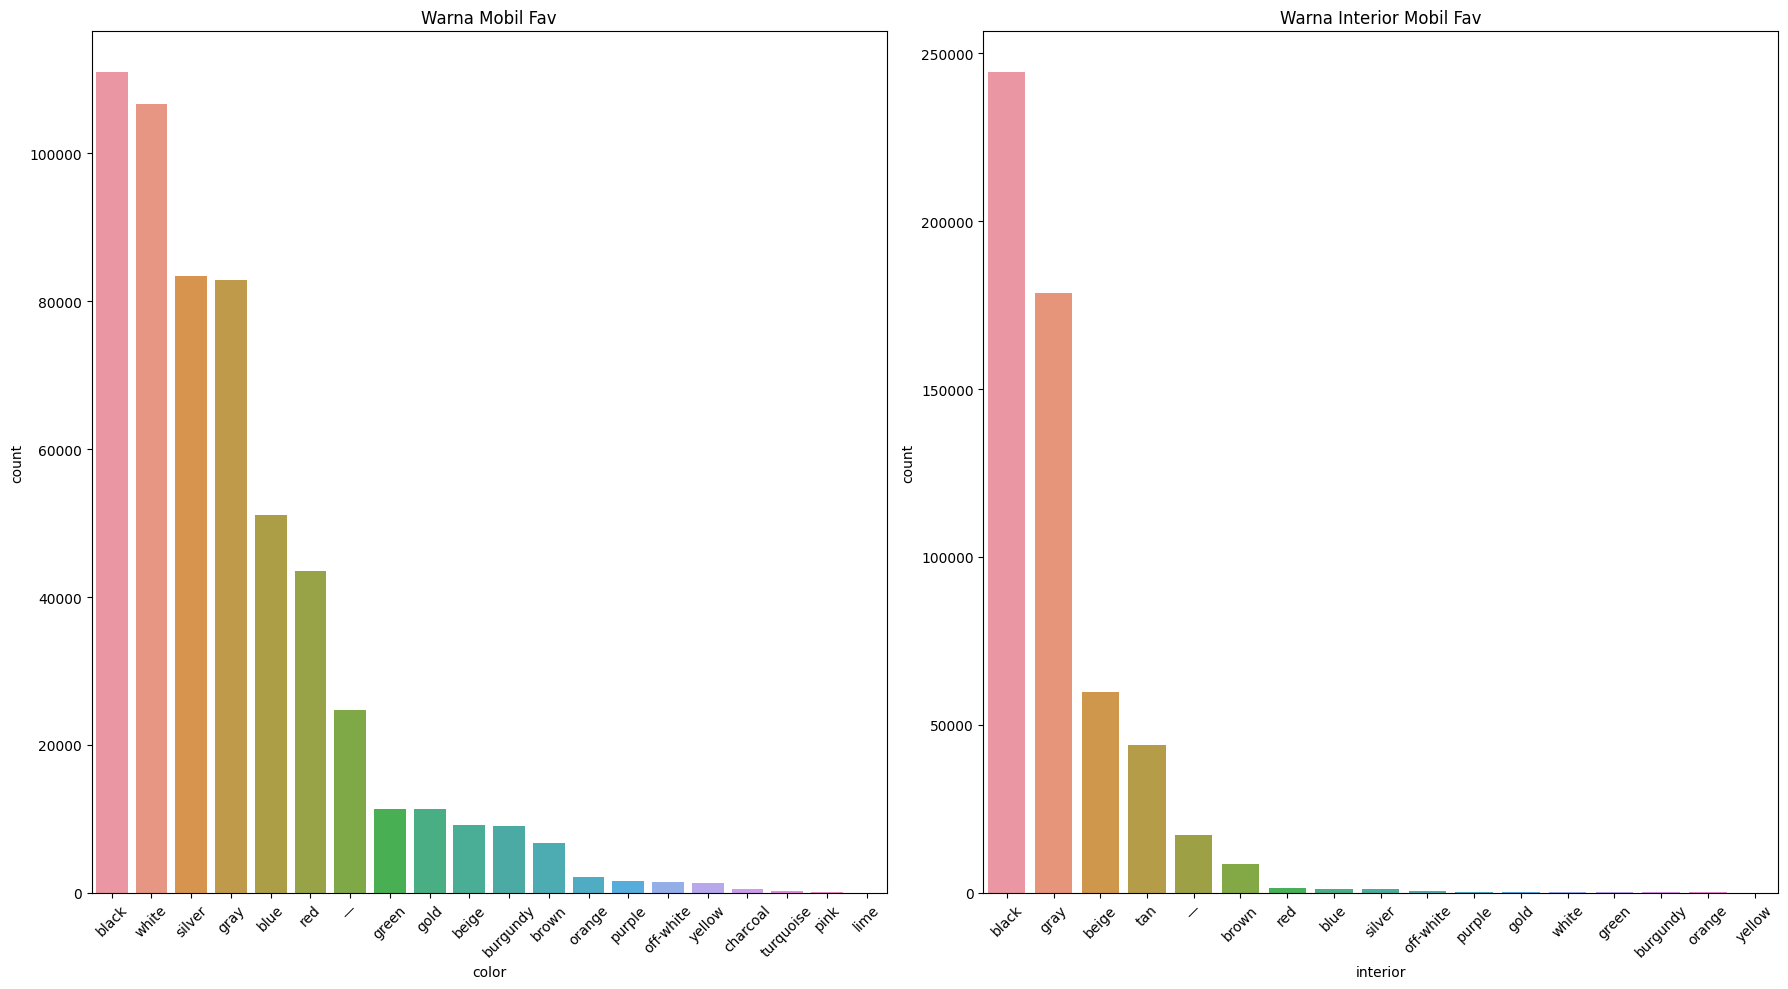

In [ ]:
#visualisasi
plt.figure(figsize= (18, 10))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Warna Mobil Fav')
plt.xticks(rotation= 45)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Warna Interior Mobil Fav')
plt.xticks(rotation= 45)
plt.tight_layout()

Dapat terlihat bahwa :
1. Untuk warna mobil dan warna interior mobil paling fav adalah warna hitam
2. Untuk warna mobil putih juga sama banyak dengan warna hitam, beda tipis
3. Warna mobil silver dan gray memiliki jumlah yg setara
4. Warna interior gray juga menjadi fav kedua setelah warna interior hitam

**Trim**

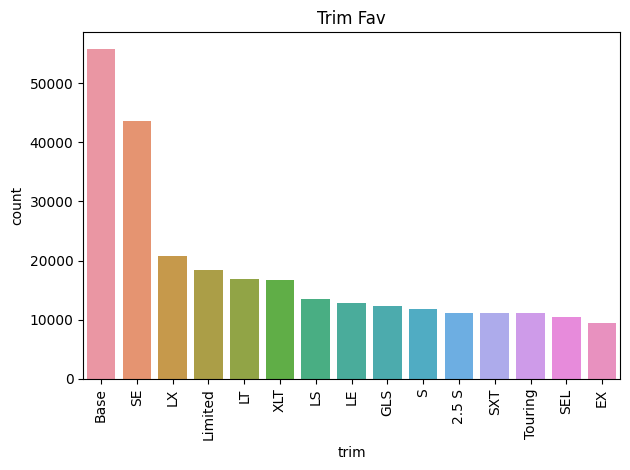

In [ ]:
#mengelompokan berdasarkan versi trim mobil
trim = dfcar.groupby('trim').size().sort_values(ascending= False).reset_index(name= 'count').head(15)

#visualisasi
plt.figure()
sns.barplot(data =trim, x='trim', y='count')
plt.title('Trim Fav')
plt.xticks(rotation= 90)
plt.tight_layout()

Terlihat bahwa versi trim mobil terbanyak adalah base, dan versi trim top 2 adalah SE. Untuk versi trim lainnya cenderung memiliki perbedaan yg tdk signifikan (hampir sama)

**State**

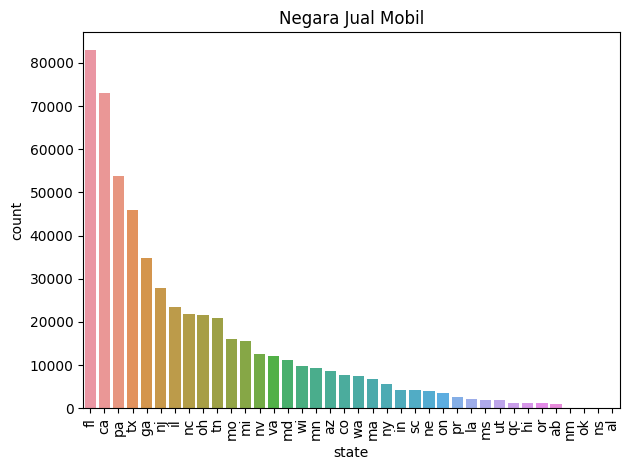

In [ ]:
#mengelompokan berdasarkan negara tempat menjual mobil
country = dfcar.groupby('state').size().sort_values(ascending= False).reset_index(name= 'count')

#visualisasi
plt.figure()
sns.barplot(data=country, x='state', y='count')
plt.title('Negara Jual Mobil')
plt.xticks(rotation= 90)
plt.tight_layout()

**Seller**

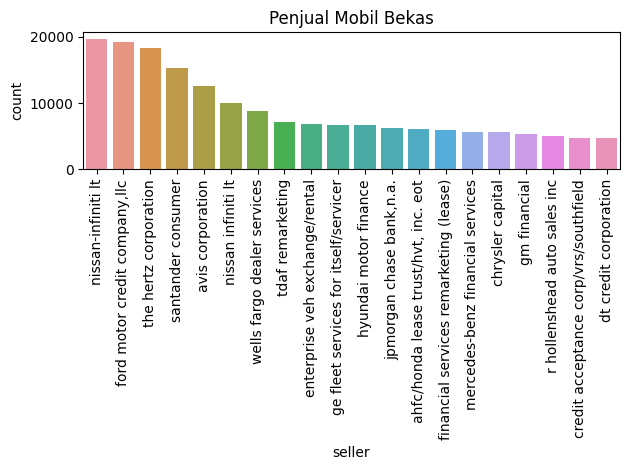

In [ ]:
#mengelompokan berdasarkan penjual
seller = dfcar.groupby('seller').size().sort_values(ascending= False).reset_index(name= 'count').head(20)

#visualisasi
plt.figure()
sns.barplot(data=seller, x='seller', y='count')
plt.title('Penjual Mobil Bekas')
plt.xticks(rotation= 90)
plt.tight_layout()

**Sale Date**

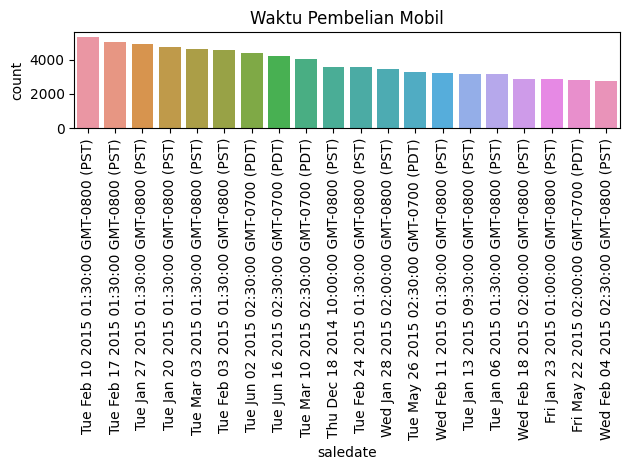

In [ ]:
#mengelompokan berdasarkan penjual
sale_date = dfcar.groupby('saledate').size().sort_values(ascending= False).reset_index(name= 'count').head(20)

#visualisasi
plt.figure()
sns.barplot(data=sale_date, x='saledate', y='count')
plt.title('Waktu Pembelian Mobil')
plt.xticks(rotation= 90)
plt.tight_layout()

In [ ]:
dfcar['saledate'] = pd.to_datetime(dfcar['saledate'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
dfcar['saledate1'] = dfcar['saledate'].dt.tz_convert('Asia/Jakarta')
dfcar['saledate2'] = dfcar['saledate1'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
# Memisahkan hari, tanggal, tahun, dan jam menjadi kolom baru dalam DataFrame
dfcar['tanggal'] = dfcar['saledate2'].dt.strftime('%d')
dfcar['bulan'] = dfcar['saledate2'].dt.strftime('%B')
dfcar['tahun'] = dfcar['saledate2'].dt.strftime('%Y')
dfcar['jam'] = dfcar['saledate2'].dt.strftime('%H:%M:%S')

# Menampilkan DataFrame hasil pemisahan
print(dfcar)

AttributeError: ignored

In [ ]:
# Menambahkan kolom baru untuk hari, bulan, tahun, jam, dan hari dalam seminggu
dfcar['day'] = dfcar['saledate2'].dt.day
dfcar['month'] = dfcar['saledate2'].dt.month
dfcar['year'] = dfcar['saledate2'].dt.year
dfcar['hour'] = dfcar['saledate2'].dt.hour
dfcar['day_of_week'] = dfcar['saledate2'].dt.dayofweek

AttributeError: ignored

**Multivariate Analysis**

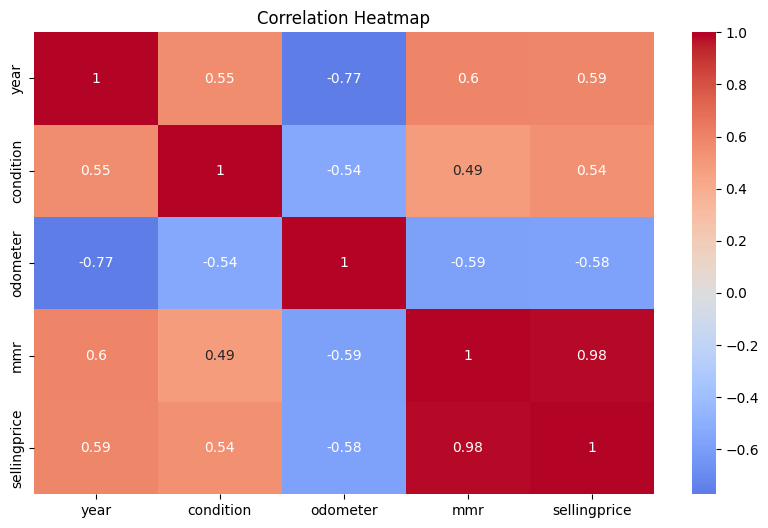

In [ ]:
# Pilih hanya kolom numerik untuk korelasi
corr_matrix = dfcar[num].corr()

# Plot korelasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. Korelasi antara 'year' dan 'sellingprice' adalah positif, menunjukkan bahwa semakin baru mobil, semakin tinggi harga jualnya.

2. 'condition' memiliki korelasi positif dengan 'sellingprice', yang berarti semakin baik kondisi mobil, semakin tinggi harga jualnya.

3. 'odometer' memiliki korelasi negatif dengan 'sellingprice', menunjukkan bahwa semakin sedikit jarak tempuh, semakin tinggi harga jualnya.

4. 'mmr' memiliki korelasi positif yang cukup kuat dengan 'sellingprice', menunjukkan bahwa harga jual yang diprediksi oleh MMR memiliki korelasi yang baik dengan harga jual aktual.